In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# all necessary imports
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [3]:
# Dataset build
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num',
'marital_status', 'occupation','relationship','race', 'sex','capital_gain',
'capital_loss','hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [11]:
test_set.head()

age   workclass  fnlwgt      education  education_num       marital_status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital_gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital_loss  hours_per_week  native_country wage_class  
0             0              40   United-States     <=50K.  
1             0              50   United-States     <=50K.  
2             0              40   United-States      >50K.  
3             0              40   United-States      >50K.  
4             0              30   United-States     <=50K.

In [5]:
train_set.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country wage_class  
0          2174             0              40   United-States      <=50K  
1             0             0              13   United-States      <=50K  
2             0             0              40   United-States      <=50K  
3             0             0              40   United-States      <=50K  
4             0             0              40            Cuba      <=50K

Pca need to be implemented,standard scaling,grid search cv.xgboost


In [4]:
x_train = train_set.drop(['wage_class'],axis=1)
y_train = train_set['wage_class']
x_test = test_set.drop(['wage_class'],axis=1)
y_test = test_set['wage_class']

In [6]:
# as education column is same as education_num so drop education col
x_train.drop(['education'],axis=1,inplace=True)
x_test.drop(['education'],axis=1,inplace=True)


In [9]:
cat_cols = ['workclass','marital_status','occupation','relationship','race','sex','native_country']
for i in cat_cols:
    le = LabelEncoder()
    x_train[i] = le.fit_transform(x_train[i])
    x_test[i] = le.transform(x_test[i])
x_train.head()
    

age  workclass  fnlwgt  education_num  marital_status  occupation  \
0   39          7   77516             13               4           1   
1   50          6   83311             13               2           4   
2   38          4  215646              9               0           6   
3   53          4  234721              7               2           6   
4   28          4  338409             13               2          10   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5

In [10]:
x_test.head()

age  workclass  fnlwgt  education_num  marital_status  occupation  \
0   25          4  226802              7               4           7   
1   38          4   89814              9               2           5   
2   28          2  336951             12               2          11   
3   44          4  160323             10               2           7   
4   18          0  103497             10               4           0   

   relationship  race  sex  capital_gain  capital_loss  hours_per_week  \
0             3     2    1             0             0              40   
1             0     4    1             0             0              50   
2             0     4    1             0             0              40   
3             0     2    1          7688             0              40   
4             3     4    0             0             0              30   

   native_country  
0              39  
1              39  
2              39  
3              39  
4              39

In [14]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [16]:
y_train,y_test

(array([0, 0, 0, ..., 0, 0, 1]), array([0, 0, 1, ..., 0, 0, 1]))

In [13]:
report = ProfileReport(train_set)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [16]:
# scaled_df_train = pd.DataFrame(data=X_train_scaled,columns=train_set.columns)
# scaled_df_train.head()

## note:-  as by pca , we are getting 90% variance (as per scre plot) in using 13 out of 15 features , so 2 features ko bacha ke kya karein?

# Model build xgboost

In [59]:
# pip install xgboost

In [17]:
bst = XGBClassifier(objective='binary:logistic',learning_rate=0.1, max_depth= 5, n_estimators=200)
# fit model
bst.fit(x_train, y_train)

# make predictions
preds = bst.predict(x_test)

In [18]:
bst.score(x_test,y_test)

0.8748234137952214

In [28]:
# RMSE
import xgboost as xgb

dmatrix = xgb.DMatrix(data=X_train_scaled, label=y_train)

params={ 'objective':'reg:squarederror',
         'max_depth': 6, 
         'colsample_bylevel':0.5,
         'learning_rate':0.01,
         'random_state':20}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 0.30


In [33]:
bst.predict(X_test_scaled)

array([0, 0, 0, ..., 1, 0, 1])

In [41]:
# Hyper parameter tuning
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}
clf = GridSearchCV(estimator=bst, 
                   param_grid=param_grid,
                   scoring='accuracy', 
                   verbose=3,
                   cv=3)
clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.861 total time=   0.1s
[CV 2/3] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.858 total time=   0.1s
[CV 3/3] END learning_rate=1, max_depth=3, n_estimators=10;, score=0.865 total time=   0.1s
[CV 1/3] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.861 total time=   0.5s
[CV 2/3] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.865 total time=   0.4s
[CV 3/3] END learning_rate=1, max_depth=3, n_estimators=50;, score=0.872 total time=   0.4s
[CV 1/3] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.859 total time=   0.8s
[CV 2/3] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.863 total time=   0.9s
[CV 3/3] END learning_rate=1, max_depth=3, n_estimators=100;, score=0.868 total time=   0.8s
[CV 1/3] END learning_rate=1, max_depth=3, n_estimators=200;, score=0.858 total time=   2.8s
[CV 2/3] END l

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=1, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=2, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()', n_estimators=2,
             

In [43]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [20]:
import sklearn.metrics as metrics

In [21]:
pr = metrics.classification_report(y_test,preds)
print(pr)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     12435
           1       0.78      0.66      0.71      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.80      0.82     16281
weighted avg       0.87      0.87      0.87     16281



In [51]:
preds

array([0, 0, 0, ..., 1, 0, 1])

In [52]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [ ]:
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States

In [22]:
from sklearn.inspection import permutation_importance


Text(0.5, 0, 'Feature Importance')

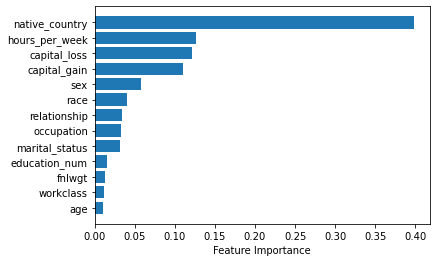

In [27]:
sort = bst.feature_importances_.argsort()
plt.barh(x_train.columns, bst.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [35]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

# New journey

In [39]:
cols_new = ['native_country','hours_per_week','capital_loss','capital_gain','sex','occupation','education_num','workclass']
x_train_new = x_train.loc[:,cols_new]
x_test_new = x_test.loc[:,cols_new]

In [44]:
print(x_train_new.head())
x_test_new.head()

   native_country  hours_per_week  capital_loss  capital_gain  sex  \
0              39              40             0          2174    1   
1              39              13             0             0    1   
2              39              40             0             0    1   
3              39              40             0             0    1   
4               5              40             0             0    0   

   occupation  education_num  workclass  
0           1             13          7  
1           4             13          6  
2           6              9          4  
3           6              7          4  
4          10             13          4  


native_country  hours_per_week  capital_loss  capital_gain  sex  \
0              39              40             0             0    1   
1              39              50             0             0    1   
2              39              40             0             0    1   
3              39              40             0          7688    1   
4              39              30             0             0    0   

   occupation  education_num  workclass  
0           7              7          4  
1           5              9          4  
2          11             12          2  
3           7             10          4  
4           0             10          0

In [46]:
bst2 = XGBClassifier(objective='binary:logistic',learning_rate=0.1, max_depth= 5, n_estimators=200)
# fit model
bst2.fit(x_train_new, y_train)

# make predictions
preds2 = bst2.predict(x_test_new)

In [48]:
pr = metrics.classification_report(y_test,preds2)
print(pr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     12435
           1       0.78      0.50      0.61      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.73      0.76     16281
weighted avg       0.84      0.85      0.84     16281



In [50]:
bst2.score(x_test_new,y_test)

0.8481051532461151

In [ ]:
['native_country','hours_per_week','capital_loss','capital_gain','sex','occupation','education_num','workclass']

In [52]:
cat_cols = ['workclass','occupation','native_country']
# for i in cat_cols:
#     le = LabelEncoder()
#     x_train[i] = le.fit_transform(x_train[i])
#     x_test[i] = le.transform(x_test[i])
# x_train.head()

In [53]:

for i in cat_cols:
    print(len(x_train[i].unique()),i)

9 workclass
15 occupation
42 native_country


In [56]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
x_train_new.head()

native_country  hours_per_week  capital_loss  capital_gain  sex  \
0              39              40             0          2174    1   
1              39              13             0             0    1   
2              39              40             0             0    1   
3              39              40             0             0    1   
4               5              40             0             0    0   

   occupation  education_num  workclass  
0           1             13          7  
1           4             13          6  
2           6              9          4  
3           6              7          4  
4          10             13          4

In [59]:
y_train

array([0, 0, 0, ..., 0, 0, 1])